In [5]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Standard imports
import glob
import pandas as pd
import os
import sklearn

# Sprint 2 folder in Drive
folder_path = '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate'

# Grab all yearly CSVs (2021–2025)
pattern = os.path.join(folder_path, 'Crime_Incidents_in_20*.csv')
files = glob.glob(pattern)
print(f"Found {len(files)} files:\n", files)

# Read and concatenate them
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Save the combined CSV back to the same Drive folder
output_csv = os.path.join(folder_path, 'dc_crime_2021_2025.csv')
df.to_csv(output_csv, index=False)
print(f" Saved combined file ({len(df)} rows) to:\n{output_csv}")


Mounted at /content/drive
Found 5 files:
 ['/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/Crime_Incidents_in_2021.csv', '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/Crime_Incidents_in_2022.csv', '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/Crime_Incidents_in_2023.csv', '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/Crime_Incidents_in_2024.csv', '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/Crime_Incidents_in_2025.csv']
 Saved combined file (126076 rows) to:
/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/dc_crime_2021_2025.csv


In [6]:
import pandas as pd
import os


folder_path = '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate'
input_csv = os.path.join(folder_path, 'dc_crime_2021_2025.csv')
output_csv = os.path.join(folder_path, 'dc_crime_2021_2025_clean.csv')

# Load and parse dates
df = pd.read_csv(input_csv, parse_dates=['START_DATE', 'END_DATE'], low_memory=False)

# Filter to 2021–2025
df = df[(df['START_DATE'] >= '2021-01-01') & (df['START_DATE'] <= '2025-12-31')]

# Drop duplicate CCN records
df = df.drop_duplicates(subset=['CCN'], keep='first')

# Drop rows missing key geographic codes
geo_fields = ['WARD', 'ANC', 'DISTRICT', 'PSA', 'CENSUS_TRACT']
df_clean = df.dropna(subset=geo_fields)

# Diagnostics
print("After date filter & dedupe:", df.shape)
print("After dropping missing geo codes:", df_clean.shape)
print("\nRemaining missing values per column:\n", df_clean.isnull().sum())

# 7) Save the cleaned dataset
df_clean.to_csv(output_csv, index=False)
print(f"\nCleaned dataset saved to: {output_csv}")


After date filter & dedupe: (118847, 25)
After dropping missing geo codes: (117520, 25)

Remaining missing values per column:
 X                            0
Y                            0
CCN                          0
REPORT_DAT                   0
SHIFT                        0
METHOD                       0
OFFENSE                      0
BLOCK                        0
XBLOCK                       0
YBLOCK                       0
WARD                         0
ANC                          0
DISTRICT                     0
PSA                          0
NEIGHBORHOOD_CLUSTER         0
BLOCK_GROUP                  2
CENSUS_TRACT                 0
VOTING_PRECINCT              1
LATITUDE                     0
LONGITUDE                    0
BID                      96055
START_DATE                   0
END_DATE                  9620
OBJECTID                     0
OCTO_RECORD_ID          117520
dtype: int64

Cleaned dataset saved to: /content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/dc_c

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted Drive; using folder: /content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate
Loading data from: /content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/dc_crime_2021_2025_clean.csv


<ipython-input-7-2e90b2972d78>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_offenses.values, y=top_offenses.index, palette='viridis')


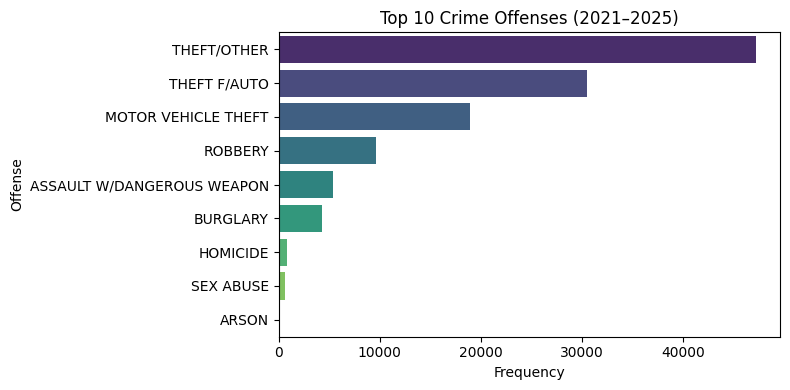

<ipython-input-7-2e90b2972d78>:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').size()


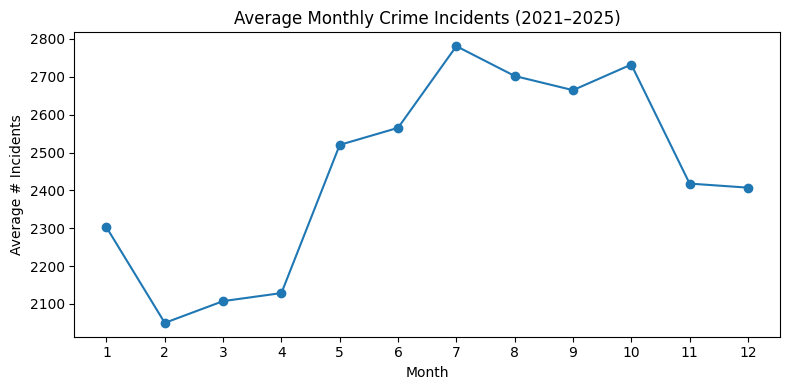

<ipython-input-7-2e90b2972d78>:52: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  for year, group in df.resample('Y'):
<ipython-input-7-2e90b2972d78>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = group.resample('M').size()
<ipython-input-7-2e90b2972d78>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = group.resample('M').size()
<ipython-input-7-2e90b2972d78>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = group.resample('M').size()
<ipython-input-7-2e90b2972d78>:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = group.resample('M').size()


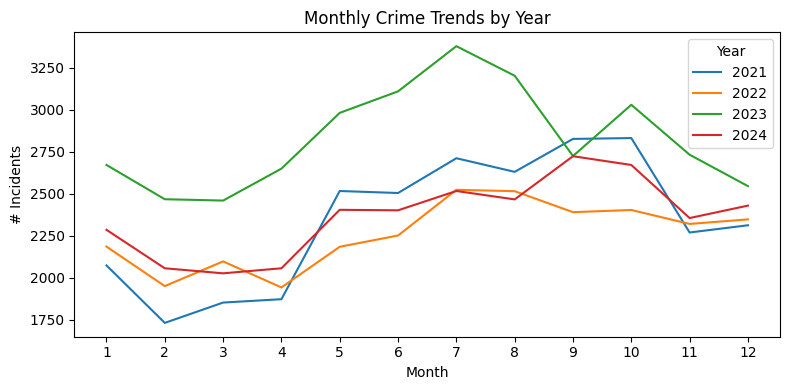

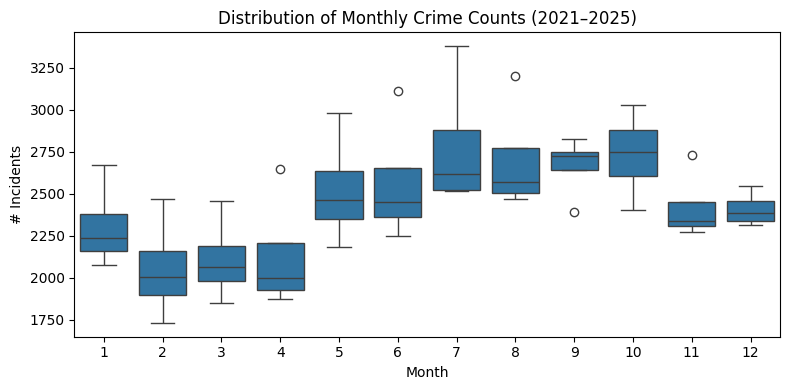

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1) Try mounting Google Drive (Colab only)
base_path = None
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate'
    print("Mounted Drive; using folder:", base_path)
except Exception:
    print("Could not mount Drive; falling back to /mnt/data")
    base_path = '/mnt/data'

# 2) Build path to the cleaned CSV
clean_csv = os.path.join(base_path, 'dc_crime_2021_2025_clean.csv')
print("Loading data from:", clean_csv)

# 3) Load data
df = pd.read_csv(clean_csv, parse_dates=['START_DATE'])
df.set_index('START_DATE', inplace=True)

# 4) Bar Chart: Top 10 Offenses
top_offenses = df['OFFENSE'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_offenses.values, y=top_offenses.index, palette='viridis')
plt.title('Top 10 Crime Offenses (2021–2025)')
plt.xlabel('Frequency')
plt.ylabel('Offense')
plt.tight_layout()
plt.show()

# Prepare monthly series
monthly_counts = df.resample('M').size()

# 5) Average Monthly Line Plot
month_avg = monthly_counts.groupby(monthly_counts.index.month).mean()
plt.figure(figsize=(8, 4))
plt.plot(range(1, 13), month_avg, marker='o')
plt.xticks(range(1, 13))
plt.title('Average Monthly Crime Incidents (2021–2025)')
plt.xlabel('Month')
plt.ylabel('Average # Incidents')
plt.tight_layout()
plt.show()


# 6) Year‐Over‐Year Overlay
plt.figure(figsize=(8, 4))
for year, group in df.resample('Y'):
    monthly = group.resample('M').size()
    plt.plot(monthly.index.month, monthly.values, label=str(year.year))
plt.xticks(range(1, 13))
plt.title('Monthly Crime Trends by Year')
plt.xlabel('Month')
plt.ylabel('# Incidents')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# 7) Box Plot by Month
monthly_df = monthly_counts.to_frame('count')
monthly_df['month'] = monthly_df.index.month
plt.figure(figsize=(8, 4))
sns.boxplot(x='month', y='count', data=monthly_df)
plt.title('Distribution of Monthly Crime Counts (2021–2025)')
plt.xlabel('Month')
plt.ylabel('# Incidents')
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import os

# 1) Mount Drive (Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2) Load cleaned crime data
base_path = '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate'
clean_csv = os.path.join(base_path, 'dc_crime_2021_2025_clean.csv')
df = pd.read_csv(clean_csv, parse_dates=['START_DATE'])

# 3) Compute tract-level incident counts (temporary target)
df['tract_count'] = df['CENSUS_TRACT'].map(df['CENSUS_TRACT'].value_counts())

# 4) Feature engineering
df['hour']           = df['START_DATE'].dt.hour
df['is_weekend']     = (df['START_DATE'].dt.weekday >= 5).astype(int)
df['month']          = df['START_DATE'].dt.month
df['is_warm_season'] = df['month'].between(3, 11).astype(int)

# Convert WARD and ANC to numeric categorical codes
df['ward_code'] = pd.Categorical(df['WARD']).codes
df['anc_code']  = pd.Categorical(df['ANC']).codes

# 5) Prepare modeling data
features = ['hour', 'is_weekend', 'is_warm_season', 'ward_code', 'anc_code']
X = df[features]
y = df['tract_count']

# 6) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 7) Random Forest for importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("Feature importances:\n", importances)


Mounted at /content/drive
Feature importances:
 anc_code          0.926016
hour              0.043811
ward_code         0.012085
is_weekend        0.009254
is_warm_season    0.008834
dtype: float64


In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/dc_crime_2021_2025_clean.csv')
print(df.columns.tolist())


['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT', 'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE', 'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID']


In [11]:
# 1) Mount Google Drive (Colab only)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2) Standard imports
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error

# 3) Load the cleaned data
base_path = '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate'
clean_csv = os.path.join(base_path, 'dc_crime_2021_2025_clean.csv')
df = pd.read_csv(clean_csv, parse_dates=['START_DATE'])

# 4) Compute tract-level incident counts (target variable)
df['tract_count'] = df['CENSUS_TRACT'].map(df['CENSUS_TRACT'].value_counts())

# 5) Feature engineering
df['hour']           = df['START_DATE'].dt.hour
df['is_weekend']     = (df['START_DATE'].dt.weekday >= 5).astype(int)
df['is_warm_season'] = df['START_DATE'].dt.month.between(3, 11).astype(int)
df['ward_code']      = pd.Categorical(df['WARD']).codes
df['anc_code']       = pd.Categorical(df['ANC']).codes

# 6) Prepare X and y
features = ['hour', 'is_weekend', 'is_warm_season', 'ward_code', 'anc_code']
X = df[features]
y = df['tract_count']

# 7) Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# 8) Define scoring metrics
scoring = {
    'R2': make_scorer(r2_score),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 9) Run 5‑fold cross‑validation
results = []
for name, model in models.items():
    cv = cross_validate(model, X, y, cv=5, scoring=scoring)
    r2   = np.mean(cv['test_R2'])
    mae  = -np.mean(cv['test_MAE'])
    rmse = np.sqrt(-np.mean(cv['test_MSE']))
    results.append((name, r2, mae, rmse))

# 10) Display results
results_df = pd.DataFrame(results, columns=['Model','R2','MAE','RMSE'])
print(results_df)


Mounted at /content/drive
               Model        R2         MAE        RMSE
0  Linear Regression  0.092572  447.492043  580.694106
1      Random Forest  0.577728  283.827767  396.042556
2  Gradient Boosting  0.575744  293.318838  396.994984


In [2]:
!pip install mgwr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 9.1 MB/s eta 0:00:00


<ipython-input-32-840b7243503a>:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['START_DATE'].dt.to_period('M').dt.to_timestamp()


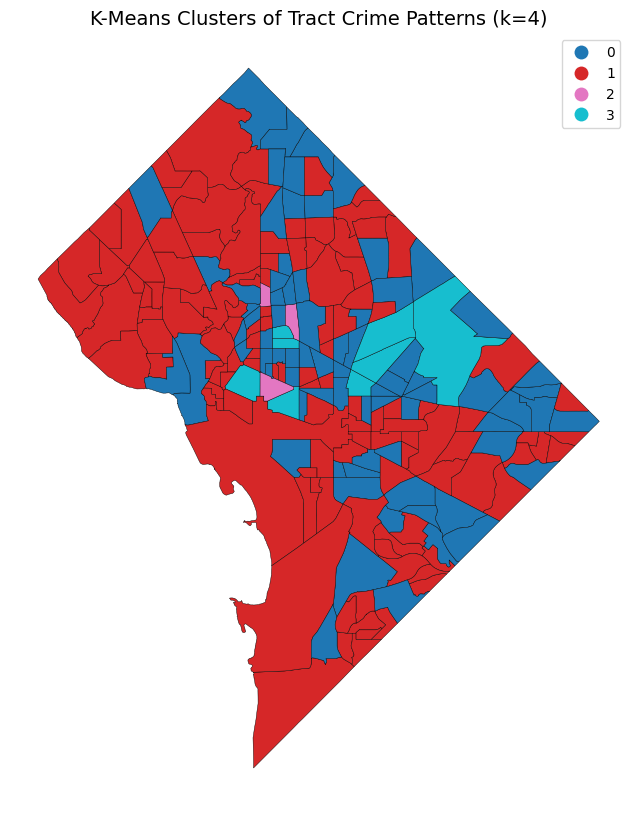

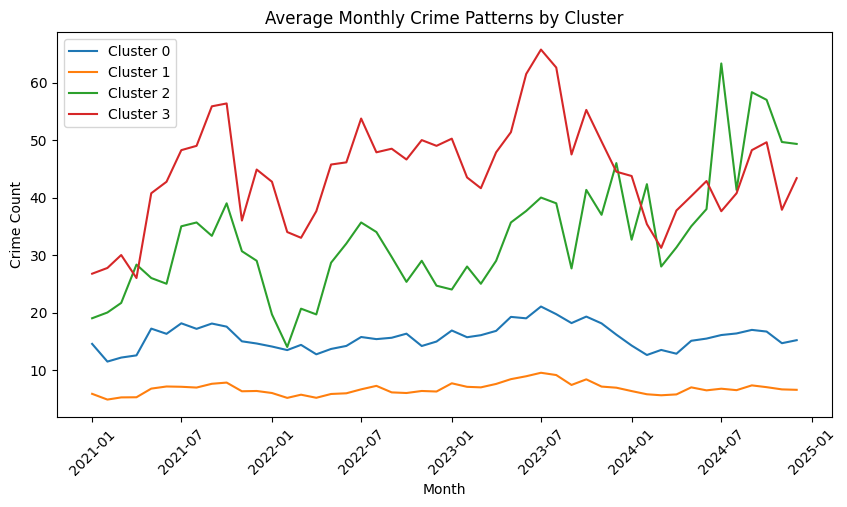

In [32]:


# !pip install scikit-learn geopandas matplotlib

import os
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Paths
base      = '/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate'
crime_fp  = os.path.join(base, 'dc_crime_2021_2025_clean.csv')  # or your master CSV
shp_fp    = os.path.join(base, 'tl_2022_11_tract.shp')

# 2. Load crime, parse date, make month
df = pd.read_csv(crime_fp, parse_dates=['START_DATE'])
df['year_month'] = df['START_DATE'].dt.to_period('M').dt.to_timestamp()

# 3. Aggregate counts per original CENSUS_TRACT and month
counts = (
    df.groupby(['CENSUS_TRACT','year_month'])
      .size()
      .reset_index(name='crime_count')
)

# 4. Build the full tract GEOID for each row
#    DC state FIPS = '11', county FIPS = '001'
counts['tract_code'] = (
    counts['CENSUS_TRACT']
    .astype(str)
    .str.split('.').str[0]            # drop any decimal
    .str.zfill(6)                     # ensure 6-digit string
)
counts['GEOID'] = '11' + '001' + counts['tract_code']

# 5. Pivot to wide format (index=GEOID, columns=months)
pivot = (
    counts
    .pivot(index='GEOID', columns='year_month', values='crime_count')
    .fillna(0)
)

# 6. Standardize each tract’s series
scaler = StandardScaler()
X = scaler.fit_transform(pivot)

# 7. K-Means clustering (e.g. k=4)
k = 4
km = KMeans(n_clusters=k, random_state=42)
pivot['cluster'] = km.fit_predict(X)

# 8. Load tract shapefile and project
tracts = gpd.read_file(shp_fp).to_crs(epsg=3857)

# 9. Merge the cluster labels on GEOID
tracts = tracts.merge(
    pivot[['cluster']],
    left_on='GEOID',
    right_index=True,
    how='inner'
)

# 10. Plot the map of clusters
fig, ax = plt.subplots(1,1, figsize=(10,10))
tracts.plot(
    column='cluster',
    categorical=True,
    cmap='tab10',
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    ax=ax
)
ax.set_title(f'K-Means Clusters of Tract Crime Patterns (k={k})', fontsize=14)
ax.set_axis_off()
plt.show()

# 11. (Optional) Plot each cluster’s centroid time series
centroids = scaler.inverse_transform(km.cluster_centers_)
fig, ax = plt.subplots(figsize=(10,5))
for i in range(k):
    ax.plot(
        pivot.columns[:-1],   # all month columns, cluster label is last col
        centroids[i],
        label=f'Cluster {i}'
    )
ax.legend()
ax.set_title('Average Monthly Crime Patterns by Cluster')
ax.set_xlabel('Month')
ax.set_ylabel('Crime Count')
plt.xticks(rotation=45)
plt.show()


In [35]:
# Clone  repo into the Colab filesystem
!git clone https://github.com/asdkhan12/crime-rate-prediction.git

# Change into that directory
%cd crime-rate-prediction



Cloning into 'crime-rate-prediction'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.
/content/crime-rate-prediction


In [36]:
#  /content/crime-rate-prediction
%cd /content/crime-rate-prediction

# Create data and notebooks folders
!mkdir -p data notebooks


/content/crime-rate-prediction


In [37]:
# Copy the cleaned crime CSV
!cp "/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/dc_crime_2021_2025_clean.csv" data/

# Copy all shapefile components
!cp "/content/drive/MyDrive/Sprint 2: 2021-2025 Crime Rate/tl_2022_11_tract."* data/

# Copy your notebooks
!cp "/content/drive/MyDrive/Data_Science_Lifecycle_Project_Proposal_Crime_Rate_Prediction.ipynb" notebooks/01_proposal.ipynb
!cp "/content/drive/MyDrive/Sprint 3 Clustering.ipynb"       notebooks/02_clustering.ipynb
!cp "/content/drive/MyDrive/Sprint 3 Modeling.ipynb"         notebooks/03_modeling.ipynb


cp: cannot stat '/content/drive/MyDrive/Data_Science_Lifecycle_Project_Proposal_Crime_Rate_Prediction.ipynb': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Sprint 3 Clustering.ipynb': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Sprint 3 Modeling.ipynb': No such file or directory
